# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | wuchang
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | wad medani
Processing Record 6 of Set 1 | alibag
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | viale
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | west bay
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | tobi village
City not found. Skipping...
Processing Record 14 of Set 1 | kulia village
City not found. Skipping...
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | sao to

Processing Record 38 of Set 4 | tambopata
Processing Record 39 of Set 4 | rumbek
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | manga
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | vedaraniyam
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | kongsberg
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | taunggyi
Processing Record 49 of Set 4 | marsabit
Processing Record 0 of Set 5 | olonkinbyen
Processing Record 1 of Set 5 | burabay
Processing Record 2 of Set 5 | angra do heroismo
Processing Record 3 of Set 5 | nova sintra
Processing Record 4 of Set 5 | coleraine
Processing Record 5 of Set 5 | puerto santa
Processing Record 6 of Set 5 | keflavik
Processing Record 7 of Set 5 | djambala
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | udachny
Processing Record 11 of Set 5 | itamara

Processing Record 25 of Set 8 | murzuq
Processing Record 26 of Set 8 | cabo san lucas
Processing Record 27 of Set 8 | enewetak
Processing Record 28 of Set 8 | corinto
Processing Record 29 of Set 8 | olyokminsk
Processing Record 30 of Set 8 | jwaneng
Processing Record 31 of Set 8 | galesong
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | coahuayana de hidalgo
Processing Record 34 of Set 8 | abong mbang
Processing Record 35 of Set 8 | palikir - national government center
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | iranshahr
Processing Record 38 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 39 of Set 8 | saint-francois
Processing Record 40 of Set 8 | canutama
Processing Record 41 of Set 8 | malango
Processing Record 42 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 43 of Set 8 | motueka
Processing Record 44 of Set 8 | lazaro cardenas
Processing Record 45 of Set 8 | qu

Processing Record 11 of Set 12 | constantia
Processing Record 12 of Set 12 | puerto lleras
Processing Record 13 of Set 12 | iquique
Processing Record 14 of Set 12 | kirando
Processing Record 15 of Set 12 | shevchenko
Processing Record 16 of Set 12 | fort st. john
Processing Record 17 of Set 12 | isola di capo rizzuto
Processing Record 18 of Set 12 | nuuk
Processing Record 19 of Set 12 | varkaus
Processing Record 20 of Set 12 | harper
Processing Record 21 of Set 12 | kununurra
Processing Record 22 of Set 12 | lucelia
Processing Record 23 of Set 12 | queenstown
Processing Record 24 of Set 12 | wahpeton
Processing Record 25 of Set 12 | armidale
Processing Record 26 of Set 12 | togur
Processing Record 27 of Set 12 | pathein
Processing Record 28 of Set 12 | sambava
Processing Record 29 of Set 12 | chibougamau
Processing Record 30 of Set 12 | morganton
Processing Record 31 of Set 12 | kingscliff
Processing Record 32 of Set 12 | viedma
Processing Record 33 of Set 12 | filadelfia
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,2.89,92,100,0.59,GL,1689531991
1,wuchang,44.9143,127.1500,17.61,99,100,3.35,CN,1689531992
2,ust-nera,64.5667,143.2000,9.24,85,44,3.59,RU,1689531992
3,edinburgh of the seven seas,-37.0676,-12.3116,13.13,78,17,13.00,SH,1689531992
4,wad medani,14.4012,33.5199,33.44,37,23,4.93,SD,1689531993


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,2.89,92,100,0.59,GL,1689531991
1,wuchang,44.9143,127.1500,17.61,99,100,3.35,CN,1689531992
2,ust-nera,64.5667,143.2000,9.24,85,44,3.59,RU,1689531992
3,edinburgh of the seven seas,-37.0676,-12.3116,13.13,78,17,13.00,SH,1689531992
4,wad medani,14.4012,33.5199,33.44,37,23,4.93,SD,1689531993


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

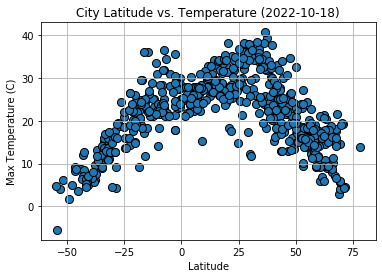

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"].values, city_data_df["Max Temp"].values, edgecolors="black",s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.rcParams["figure.figsize"] = [9,7]
plt.rcParams["font.size"] = 15

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

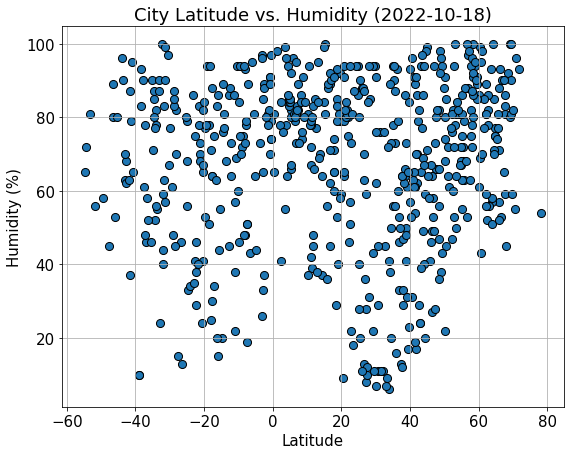

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"].values, city_data_df["Humidity"].values,edgecolors="black",s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.rcParams["figure.figsize"] = [9,7]
plt.rcParams["font.size"] = 15

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

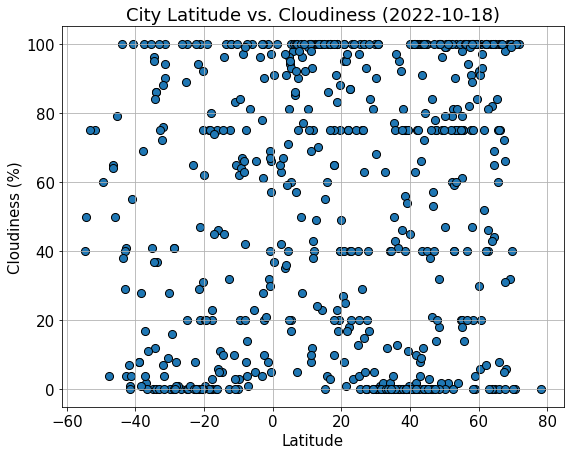

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"].values, city_data_df["Cloudiness"].values, edgecolors='black',s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.rcParams["figure.figsize"] = [9,7]
plt.rcParams["font.size"] = 15

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

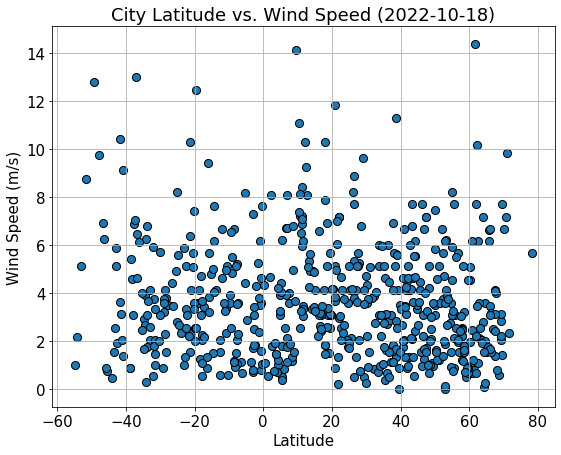

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"].values, city_data_df["Wind Speed"].values, edgecolors="black",s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.rcParams["figure.figsize"] = [9,7]
plt.rcParams["font.size"] = 15

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regress_model(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    eq = f"y = {str(round(slope, 2))}x + {str(round(intercept,2))}"
    return [regress_values, eq, rvalue]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,2.89,92,100,0.59,GL,1689531991
1,wuchang,44.9143,127.1500,17.61,99,100,3.35,CN,1689531992
2,ust-nera,64.5667,143.2000,9.24,85,44,3.59,RU,1689531992
4,wad medani,14.4012,33.5199,33.44,37,23,4.93,SD,1689531993
5,alibag,18.6411,72.8792,26.04,85,100,5.14,IN,1689531993


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,13.13,78,17,13.00,SH,1689531992
8,viale,-31.8678,-60.0072,12.82,40,76,3.76,AR,1689531995
13,adamstown,-25.0660,-130.1015,20.91,79,100,2.82,PN,1689531998
16,grytviken,-54.2811,-36.5092,-5.50,72,50,2.16,GS,1689531999
17,port-aux-francais,-49.3500,70.2167,1.78,58,60,12.81,TF,1689531999


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6563232544951891


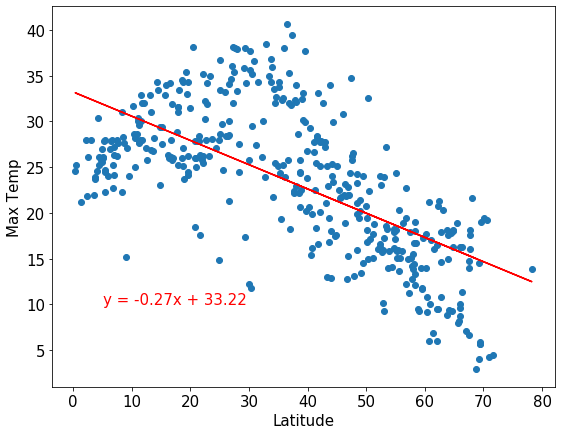

<Figure size 576x576 with 0 Axes>

In [15]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x, regress_values,"r-")
plt.annotate(annotation, (5,10),fontsize=15,color="red")
plt.figure(figsize=(8, 8))
plt.tight_layout()
plt.show()

The r-value is: 0.8458672710461371


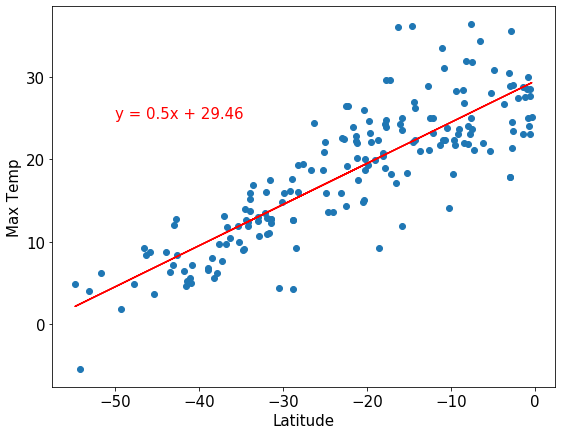

<Figure size 576x576 with 0 Axes>

In [16]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]

regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x, regress_values, "r-")
plt.annotate(annotation,(-50,25),fontsize=15,color="red")
plt.figure(figsize=(8,8))
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [17]:
# We see that for both regression models, there is some correlation within the two. The plots in the Northern and Southern
# Hemisphere have correlation coefficients equating to -0.615 and .778, respectively. This could mean that Max Temp is highly
# correlated with latitude direction. As we can also see how our regression model is directed, shows the way these temperatures
# act according to region. The direction pattern also is consitent with each other as what occurs in nature. For example, 
# in the N. hemisphere, the farther away from the equator the line follows, the Max Temps decrease in value or get colder.
# Same for the S. hemisphere, the farther away from the equator, the lower the Max Temp values. Our linear regression models 
# depict global temperature patterns correctly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.040964028619371796


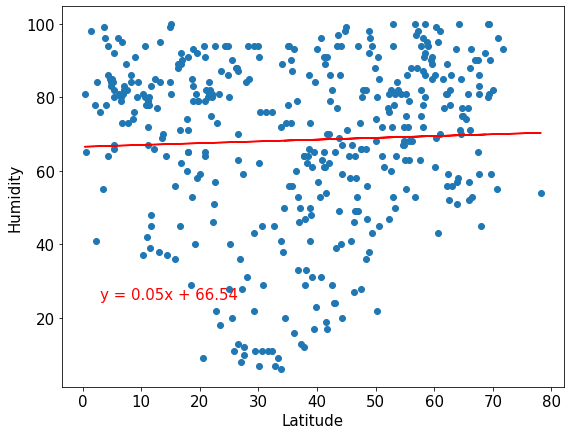

<Figure size 576x576 with 0 Axes>

In [18]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x, regress_values,"r-")
plt.annotate(annotation, (3,25),fontsize=15,color="red")
plt.figure(figsize=(8, 8))
plt.tight_layout()
plt.show()

The r-value is: 0.05040010195013475


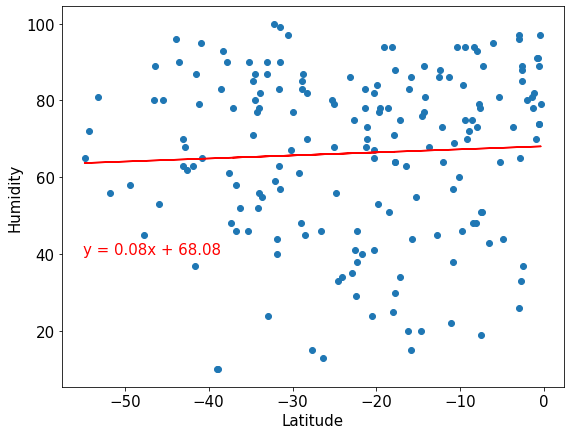

<Figure size 576x576 with 0 Axes>

In [19]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]

regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x, regress_values, "r-")
plt.annotate(annotation,(-55,40),fontsize=15,color="red")
plt.figure(figsize=(8,8))
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [20]:
# Our LInear regression models of the latitude vs humidity plot show little to no correlation. If we solely analyze the
# concentration of scatter plots, we see that they are randomly spread out. This means anywhere above or below the equator, 
# we can find cities varying amount of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.030197580167517363


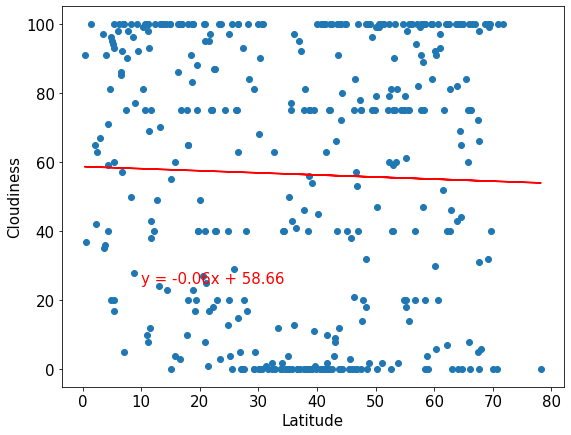

<Figure size 576x576 with 0 Axes>

In [21]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x, regress_values,"r-")
plt.annotate(annotation, (10,25),fontsize=15,color="red")
plt.figure(figsize=(8, 8))
plt.tight_layout()
plt.show()

The r-value is: 0.07916562346588434


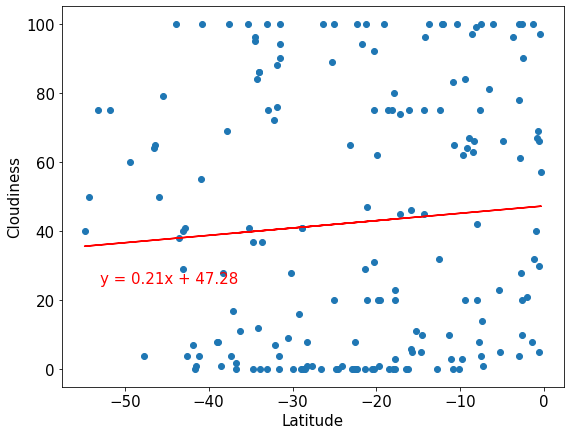

<Figure size 576x576 with 0 Axes>

In [22]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]

regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x, regress_values, "r-")
plt.annotate(annotation,(-53,25),fontsize=15,color="red")
plt.figure(figsize=(8,8))
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
# Our Cloudiness vs Latitude plots also show little to no correlation. If we look at the distribution of the scatter points
# we see there is an equal amount of cities with 100% cloudiness to 0% cloudiness no matter the latitude direction. There
# is still a bit of descrepancy due to the selective sample set which can be biased depending on the frequency of longitudinal
# points which is a metric not taken into consideration in this analysis.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13171590787883145


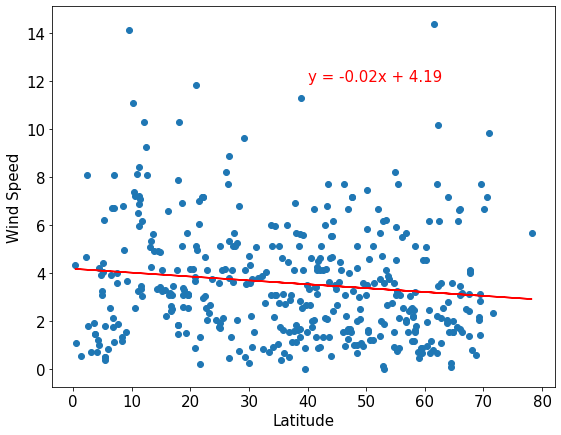

<Figure size 576x576 with 0 Axes>

In [24]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x, regress_values,"r-")
plt.annotate(annotation, (40,12),fontsize=15,color="red")
plt.figure(figsize=(8, 8))
plt.tight_layout()
plt.show()

The r-value is: -0.143422772017883


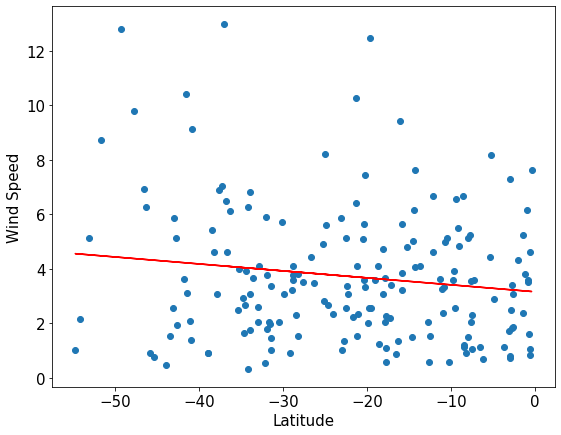

<Figure size 576x576 with 0 Axes>

In [25]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]

regress_values = regress_model(x, y)[0]
annotation = regress_model(x, y)[1]
rvalue = regress_model(x, y)[2]

print(f"The r-value is: {rvalue}")

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x, regress_values, "r-")
# plt.annotate(annotation,(-40,12),fontsize=15,color="red")
plt.figure(figsize=(8,8))
plt.tight_layout
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [26]:
# Another plot that doesn't show any correlation would be latitude and wind speed. It seems that most of the scatter points
# are concentrated at a low wind speed. We also come across a couple outliers at different latitudes, however its such a small
# sample where their significance is negligible. I think better fields to compare would be elevation as wind speeds are more
# correlated with that. If we can visualize elevation of cities to wind speed, I believe we would see a higher r-value coefficient.
